In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [ ]:
df = df.rename(columns={'v1': 'Target', 'v2': 'Text'})

Replacing null values with string

In [ ]:
df = df.where((pd.notnull(df)),'')

Encoding the Target column

In [ ]:
df['Target'] = df['Target'].map({'ham': 0, 'spam': 1})

Splitting data into Target and features

In [ ]:
X = df['Text']
y = df['Target']

Splitting data into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

Training the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_features, y_train)

RandomForestClassifier()

Evaluating the model

In [ ]:
training_data_prediction = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, training_data_prediction)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  1.0


In [ ]:
test_data_prediction = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, test_data_prediction)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9820627802690582


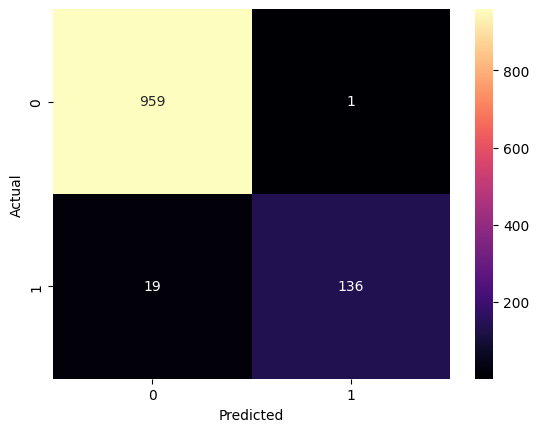

-------------------------------------------------------------------

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.99      0.88      0.93       155

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
cm = confusion_matrix(y_test, test_data_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('-------------------------------------------------------------------')
print("\nValidation Classification Report:\n", classification_report(y_test, test_data_prediction))

Building a predictive system

In [ ]:
input_mail = ["Anything lor... U decide...,,,"]

input_mail_feature = feature_extraction.transform(input_mail)

prediction = model.predict(input_mail_feature)
print(prediction)

if prediction[0]==0:
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'spam_model.sav'
vectorizer_filename = 'vectorizer.pkl'

pickle.dump(model, open('spam_model.pkl', "wb"))
pickle.dump(feature_extraction, open("vectorizer.pkl", "wb"))

Loading the trained data

In [ ]:
loaded_model = pickle.load(open('spam_model.pkl','rb'))
loaded_vectorizer = pickle.load(open('vectorizer.pkl','rb'))

Predictive System

In [ ]:
input_mail = ["Anything lor... U decide...,,,"]

input_mail_feature = loaded_vectorizer.transform(input_mail)

prediction = loaded_model.predict(input_mail_feature)
print(prediction)

if prediction[0]==0:
  print('Ham mail')

else:
  print('Spam mail')

[0]
Ham mail
